In [17]:
import pandas as pd

df = pd.read_csv('q3_data_csv.csv')

In [18]:
df

,relevance_scores,qid,f1,f2,f3,f4,f5,f6,f7,f8,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136
0,0,4,3,0,2,0,3,1.000000,0.0,0.666667,...,27,2,9,124,4678,54,74,0,0,0.000000
1,0,4,3,0,3,0,3,1.000000,0.0,1.000000,...,61,0,8,122,508,131,136,0,0,0.000000
2,0,4,3,0,2,0,3,1.000000,0.0,0.666667,...,31,2,8,115,508,51,70,0,0,0.000000
3,0,4,3,0,3,0,3,1.000000,0.0,1.000000,...,32,82,17,122,508,83,107,0,10,13.350000
4,1,4,3,0,3,0,3,1.000000,0.0,1.000000,...,29,11,8,121,508,103,120,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0,4,3,0,2,0,3,1.000000,0.0,0.666667,...,62,35,1,153,4872,9,55,0,0,0.000000
99,1,4,3,0,3,2,3,1.000000,0.0,1.000000,...,52,367,6,153,2383,18,99,0,16,11.316667
100,2,4,2,0,2,0,2,0.666667,0.0,0.666667,...,28,0,0,49182,26966,15,69,0,193,21.935560
101,1,4,2,0,2,0,2,0.666667,0.0,0.666667,...,23,0,1,42877,26562,12,24,0,56,62.920604


In [19]:
sorted_df = df.sort_values(by='relevance_scores', ascending=False)

In [20]:
sorted_df

,relevance_scores,qid,f1,f2,f3,f4,f5,f6,f7,f8,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136
7,3,4,3,0,2,1,3,1.000000,0.000000,0.666667,...,32,349,8,123,281,22,6,0,0,0.000000
76,2,4,2,0,1,0,2,0.666667,0.000000,0.333333,...,19,0,0,2417,721,14,113,0,13,47.900000
40,2,4,3,2,2,0,3,1.000000,0.666667,0.666667,...,33,8,3,1888,9338,3,11,0,0,0.000000
36,2,4,3,0,2,0,3,1.000000,0.000000,0.666667,...,17,0,2,12028,11379,26,24,0,77,23.959522
90,2,4,3,0,3,3,3,1.000000,0.000000,1.000000,...,67,27,0,814,13555,108,113,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,0,4,2,0,0,0,2,0.666667,0.000000,0.000000,...,41,8,0,868,9260,246,88,0,0,0.000000
43,0,4,2,0,0,0,2,0.666667,0.000000,0.000000,...,38,4,0,797,9260,237,80,0,0,0.000000
42,0,4,3,0,3,1,3,1.000000,0.000000,1.000000,...,65,83,5,144,262,157,179,0,0,0.000000
41,0,4,3,1,3,2,3,1.000000,0.333333,1.000000,...,65,195,8,124,206,103,121,0,0,0.000000


In [21]:
print(df['relevance_scores'].value_counts()[3])
print(df['relevance_scores'].value_counts()[2])
print(df['relevance_scores'].value_counts()[1])
print(df['relevance_scores'].value_counts()[0])


1
17
26
59


In [25]:
# For number of ways this can be achieved
import numpy as np

ans = np.math.factorial(df['relevance_scores'].value_counts()[3]) * np.math.factorial(df['relevance_scores'].value_counts()[2]) * np.math.factorial(df['relevance_scores'].value_counts()[1]) * np.math.factorial(df['relevance_scores'].value_counts()[0])
print(ans)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [30]:
import numpy as np
def finding_DCG(df,n):
    rel_scores = list(df['relevance_scores'])
    DCG_score = 0
    for i in range(n):
        rel_i = rel_scores[i]
        log_val = np.log(i+2)
        DCG_score = DCG_score + rel_i/log_val
    return DCG_score

In [31]:
DCG_ori_full = finding_DCG(df, len(df.index))
IDCG_val_full = finding_DCG(sorted_df, len(sorted_df.index))
nDCG_val_full = DCG_ori_full/ IDCG_val_full
print(nDCG_val_full)

DCG_ori_50 = finding_DCG(df, 50)
IDCG_val_50 = finding_DCG(sorted_df, 50)
nDCG_val_50 = DCG_ori_50/ IDCG_val_50
print(nDCG_val_50)

0.6357153091990773
0.37071213897397365


In [34]:
sorted75_df = df.sort_values(by='f75', ascending=False)
sorted75_df

,relevance_scores,qid,f1,f2,f3,f4,f5,f6,f7,f8,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136
8,0,4,3,0,3,0,3,1.000000,0.000000,1.000000,...,51,766,0,119,32560,45,24,0,0,0.000000
67,0,4,3,0,3,2,3,1.000000,0.000000,1.000000,...,61,0,9,120,392,162,169,0,0,0.000000
56,0,4,3,1,3,1,3,1.000000,0.333333,1.000000,...,48,189,8,549,2650,91,114,0,0,0.000000
1,0,4,3,0,3,0,3,1.000000,0.000000,1.000000,...,61,0,8,122,508,131,136,0,0,0.000000
101,1,4,2,0,2,0,2,0.666667,0.000000,0.666667,...,23,0,1,42877,26562,12,24,0,56,62.920604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,4,2,0,0,0,2,0.666667,0.000000,0.000000,...,19,0,2,59949,22708,5,6,0,391,28.267114
16,0,4,3,0,0,0,3,1.000000,0.000000,0.000000,...,48,2,2,144,1917,19,119,0,0,0.000000
86,0,4,3,0,0,0,3,1.000000,0.000000,0.000000,...,34,43,2,3262,1859,20,165,0,0,0.000000
49,0,4,1,0,1,0,1,0.333333,0.000000,0.333333,...,24,11,0,9040,8756,51,17,0,10,20.133333


In [37]:
precision_k = []
recall_k = []
rel_k = 0
total_rel = 0

listf75 = list(sorted75_df['relevance_scores'])


In [38]:
listf75

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0]

In [39]:
for i in listf75:
    if i > 0:
        total_rel = total_rel +1

for i in range(len(listf75)):
    if(listf75[i] != 0): 
        rel_k += 1 
    p_k = rel_k / (i + 1) 
    r_k = rel_k / total_rel 
    precision_k.append(p_k)
    recall_k.append(r_k)

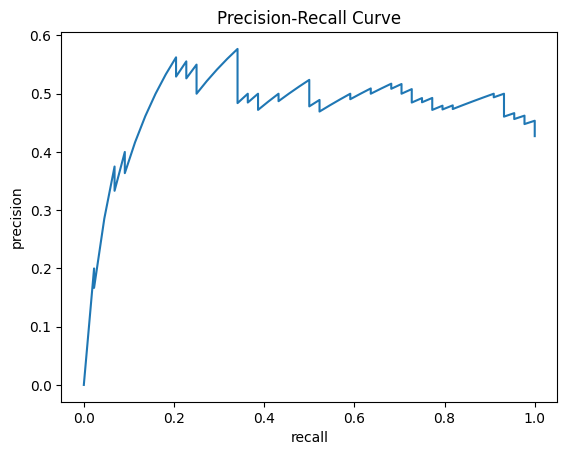

In [40]:
import matplotlib.pyplot as plt

plt.plot(recall_k, precision_k)
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("Precision-Recall Curve")
plt.savefig('Precision_Recall_Curve.png', bbox_inches='tight', facecolor='white')
plt.show()